In [1]:
!pwd
!git clone https://github.com/ShouvikGhosh2048/AML-project/

/content
Cloning into 'AML-project'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 70 (delta 21), reused 60 (delta 11), pack-reused 0
Unpacking objects: 100% (70/70), 40.05 MiB | 6.10 MiB/s, done.
Updating files: 100% (13/13), done.


In [2]:
%cd AML-project/

/content/AML-project


In [3]:
!ls -a

.		count_files.sh	    .dvcignore	       requirements.text
..		create_datasets.sh  .git	       templates
app.py		data.dvc	    .gitignore	       transfer_learning.ipynb
baseline.ipynb	.dvc		    model_scripted.pt


In [4]:
!python3 -m pip install -r requirements.text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.2/408.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3

In [9]:
!dvc pull

Checkout:   0% 0/111592 [00:00<?, ?file/s{'info': ''}]
!
Building data objects from data          |0.00 [00:00,      ?obj/s]
Building data objects from data          |86.0 [00:00,    840obj/s]
Building data objects from data          |392 [00:00,  2.13kobj/s] 
Building data objects from data          |1.20k [00:00,  4.81kobj/s]
Building data objects from data          |2.42k [00:00,  7.71kobj/s]
Building data objects from data          |3.61k [00:00,  9.25kobj/s]
Building data objects from data          |4.98k [00:00,  10.7kobj/s]
Building data objects from data          |6.32k [00:00,  11.6kobj/s]
Building data objects from data          |7.77k [00:00,  12.5kobj/s]
Building data objects from data          |9.19k [00:00,  13.0kobj/s]
Building data objects from data          |10.6k [00:01,  13.3kobj/s]
Building data objects from data          |11.9k [00:01,  9.07kobj/s]
Building data objects from data          |13.3k [00:01,  10.2kobj/s]
Building data objects from data          |14.7k [

In [10]:
# counting number of images for each class
%%bash
DIRECTORIES=( $(ls data/tsinghua/low-resolution) )
for DIRECTORY in "${DIRECTORIES[@]}"
do
    ls -1 data/tsinghua/low-resolution/$DIRECTORY | wc -l
done

1043
1121
1160
1324
1936
200
200
200
201
202
202
202
203
203
203
203
203
205
205
206
206
206
206
206
207
207
207
207
207
209
209
209
209
209
210
210
211
211
211
211
211
211
211
211
214
214
215
215
215
216
216
216
217
217
217
217
217
2192
219
220
220
220
221
222
223
223
223
228
224
224
225
225
225
226
226
227
227
228
229
230
230
230
231
231
232
232
232
233
233
2342
234
234
234
235
235
235
237
237
238
241
243
245
249
249
253
253
257
258
2594
274
276
276
286
2909
2925
3083
316
318
329
3336
340
3580
361
420
480
5355
561
7449
798
806


In [11]:
# creating the train and validation datasets
%%bash
DIRECTORIES=( $(ls data/tsinghua/low-resolution) )

rm -rf data/smaller_dataset
mkdir data/smaller_dataset
mkdir data/smaller_dataset/train
mkdir data/smaller_dataset/val

# for i in {1..1}
# do
#     echo $DIRECTORIES[$i]
#     find data/Images/$DIRECTORIES[$i] -maxdepth 1 -type f
# done

for DIRECTORY in "${DIRECTORIES[@]}"
do
    files=( $(ls data/tsinghua/low-resolution/$DIRECTORY) )

    # creating training dataset
    echo "Copying top 50 files from data/tsinghua/low-resolution/$DIRECTORY to data/smallar_dataset/train/$DIRECTORY"
    mkdir "data/smaller_dataset/train/$DIRECTORY"
    for i in {1..50}
    do
        cp data/tsinghua/low-resolution/$DIRECTORY/${files[i]} data/smaller_dataset/train/$DIRECTORY/${files[i]}
    done

    # creating validation dataset
    echo "Copying next 10 files from data/tsinghua/low-resolution/$DIRECTORY to data/smallar_dataset/val/$DIRECTORY"
    mkdir "data/smaller_dataset/val/$DIRECTORY"
    for i in {51..60}
    do
        cp data/tsinghua/low-resolution/$DIRECTORY/${files[i]} data/smaller_dataset/val/$DIRECTORY/${files[i]}
    done
done


Copying top 50 files from data/tsinghua/low-resolution/1043-n000001-Shiba_Dog to data/smallar_dataset/train/1043-n000001-Shiba_Dog
Copying next 10 files from data/tsinghua/low-resolution/1043-n000001-Shiba_Dog to data/smallar_dataset/val/1043-n000001-Shiba_Dog
Copying top 50 files from data/tsinghua/low-resolution/1121-n000002-French_bulldog to data/smallar_dataset/train/1121-n000002-French_bulldog
Copying next 10 files from data/tsinghua/low-resolution/1121-n000002-French_bulldog to data/smallar_dataset/val/1121-n000002-French_bulldog
Copying top 50 files from data/tsinghua/low-resolution/1160-n000003-Siberian_husky to data/smallar_dataset/train/1160-n000003-Siberian_husky
Copying next 10 files from data/tsinghua/low-resolution/1160-n000003-Siberian_husky to data/smallar_dataset/val/1160-n000003-Siberian_husky
Copying top 50 files from data/tsinghua/low-resolution/1324-n000004-malamute to data/smallar_dataset/train/1324-n000004-malamute
Copying next 10 files from data/tsinghua/low-res

In [12]:
!ls -a data/smaller_dataset/train/1043-n000001-Shiba_Dog/

.	      n100011.jpeg  n100022.jpg   n100033.jpeg	n100044.jpg
..	      n100012.jpg   n100023.jpg   n100034.jpeg	n100045.jpg
n100002.jpeg  n100013.jpg   n100024.jpeg  n100035.jpeg	n100046.jpg
n100003.jpeg  n100014.jpg   n100025.jpeg  n100036.jpeg	n100047.jpg
n100004.jpg   n100015.jpeg  n100026.jpeg  n100037.jpeg	n100048.jpg
n100005.jpg   n100016.jpeg  n100027.jpeg  n100038.jpg	n100049.jpg
n100006.jpg   n100017.jpeg  n100028.jpeg  n100039.jpg	n100050.jpeg
n100007.jpg   n100018.jpg   n100029.jpeg  n100040.jpg	n100052.jpeg
n100008.jpg   n100019.jpg   n100030.jpeg  n100041.jpg
n100009.jpeg  n100020.jpg   n100031.jpeg  n100042.jpg
n100010.jpeg  n100021.jpg   n100032.jpeg  n100043.jpg


In [13]:
!ls -a data/smaller_dataset/val/1043-n000001-Shiba_Dog/

.   n100053.jpg  n100055.jpg  n100057.jpg  n100059.jpg	n100061.jpg
..  n100054.jpg  n100056.jpg  n100058.jpg  n100060.jpg	n100062.jpg


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode  wa

In [15]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [16]:
data_dir = 'data/smaller_dataset/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
# printing the class names
print(class_names)

['1043-n000001-Shiba_Dog', '1121-n000002-French_bulldog', '1160-n000003-Siberian_husky', '1324-n000004-malamute', '1936-n000005-Pomeranian', '200-n000008-Airedale', '200-n000010-miniature_poodle', '200-n000012-affenpinscher', '201-n000024-schipperke', '202-n000020-Australian_terrier', '202-n000023-Welsh_springer_spaniel', '202-n000028-curly_coated_retriever', '203-n000015-Staffordshire_bullterrier', '203-n000016-Norwich_terrier', '203-n000021-Tibetan_terrier', '203-n000022-English_setter', '203-n000027-Norfolk_terrier', '205-n000029-Pembroke', '205-n000030-Tibetan_mastiff', '206-n000007-Border_terrier', '206-n000035-Great_Dane', '206-n000037-Scotch_terrier', '206-n000047-flat_coated_retriever', '206-n000051-Saluki', '207-n000011-Irish_setter', '207-n000026-Blenheim_spaniel', '207-n000036-Irish_terrier', '207-n000044-bloodhound', '207-n000045-redbone', '209-n000040-West_Highland_white_terrier', '209-n000042-Brabancon_griffo', '209-n000043-dhole', '209-n000049-kelpie', '209-n000054-Dober

In [18]:
len(class_names)

130

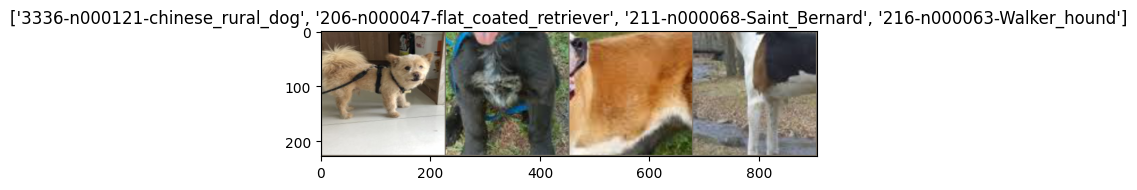

In [19]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [20]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [21]:
# updating only the last layer
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


Epoch 0/24
----------
train Loss: 4.0308 Acc: 0.1280
val Loss: 1.8356 Acc: 0.5269

Epoch 1/24
----------
train Loss: 2.8278 Acc: 0.3343
val Loss: 1.2500 Acc: 0.6369

Epoch 2/24
----------
train Loss: 2.3961 Acc: 0.4154
val Loss: 1.1015 Acc: 0.6677

Epoch 3/24
----------
train Loss: 2.2044 Acc: 0.4432
val Loss: 1.0422 Acc: 0.7100

Epoch 4/24
----------
train Loss: 2.0386 Acc: 0.4731
val Loss: 1.0054 Acc: 0.7008

Epoch 5/24
----------
train Loss: 2.0075 Acc: 0.4889
val Loss: 0.9251 Acc: 0.7215

Epoch 6/24
----------
train Loss: 1.9278 Acc: 0.5074
val Loss: 0.9515 Acc: 0.7369

Epoch 7/24
----------
train Loss: 1.7915 Acc: 0.5540
val Loss: 0.9046 Acc: 0.7377

Epoch 8/24
----------
train Loss: 1.7228 Acc: 0.5698
val Loss: 0.8774 Acc: 0.7531

Epoch 9/24
----------
train Loss: 1.7027 Acc: 0.5772
val Loss: 0.8899 Acc: 0.7438

Epoch 10/24
----------
train Loss: 1.7458 Acc: 0.5622
val Loss: 0.9272 Acc: 0.7438

Epoch 11/24
----------
train Loss: 1.7325 Acc: 0.5695
val Loss: 0.8626 Acc: 0.7531

Ep

In [22]:
# saving the model
model_scripted = torch.jit.script(model_conv) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save


In [23]:
# loading the model
loaded_model = torch.jit.load('model_scripted.pt')
loaded_model.eval()

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
    )
    (1): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)

In [24]:
from google.colab import files
files.download('./model_scripted.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>